In [20]:
import scanpy as sc
from pertpy import data as scpert_data
import os 
import seaborn as sns 
import matplotlib.lines as mlines
import pickle as pkl 

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

# Plot full distribution

In [21]:
if not os.path.exists("norman_normed.h5ad"):
    norman = scpert_data.norman_2019_raw()
    replogle_k562 = scpert_data.replogle_2022_k562_essential()
    replogle_rpe1 = scpert_data.replogle_2022_rpe1()
    
    # normalise all the data 
    sc.pp.normalize_total(norman)
    sc.pp.normalize_total(replogle_k562)
    sc.pp.normalize_total(replogle_rpe1)
    
    # log transform the data
    sc.pp.log1p(norman)
    sc.pp.log1p(replogle_k562)
    sc.pp.log1p(replogle_rpe1)
    
    # save the data
    norman.write("norman_normed.h5ad")
    replogle_k562.write("replogle_k562_normed.h5ad")
    replogle_rpe1.write("replogle_rpe1._normed.h5ad")
else:
    norman = sc.read("norman_normed.h5ad")
    replogle_k562 = sc.read("replogle_k562_normed.h5ad")
    replogle_rpe1 = sc.read("replogle_rpe1_normed.h5ad")

In [22]:
nonzero_genes = (norman.X.sum(axis=0) > 5).A1
filt_norman = norman[:, nonzero_genes]
single_gene_mask = [True if "," not in name else False for name in filt_norman.obs['guide_ids']]
sg_norman= filt_norman[single_gene_mask, :]
sg_norman.obs['condition'] = sg_norman.obs['guide_ids'].replace('', 'ctrl')

genes = sg_norman.var['gene_symbols'].to_list()
genes_and_ctrl = genes + ['ctrl']

# we remove the cells with perts that are not in the genes because we need gene expression values
# to generate an in-silico perturbation embedding
sg_norman = sg_norman[sg_norman.obs['condition'].isin(genes_and_ctrl), :]

/var/folders/km/jgnm5nbx7tg_j37y7_0657q00000gn/T/ipykernel_2085/1334929040.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  sg_norman.obs['condition'] = sg_norman.obs['guide_ids'].replace('', 'ctrl')
/var/folders/km/jgnm5nbx7tg_j37y7_0657q00000gn/T/ipykernel_2085/1334929040.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sg_norman.obs['condition'] = sg_norman.obs['guide_ids'].replace('', 'ctrl')


In [4]:
pert_norman_data = sg_norman[sg_norman.obs['condition'] != 'ctrl', :]
ctrl_norman_data = sg_norman[sg_norman.obs['condition'] == 'ctrl', :]

In [5]:
replogle_k562.obs['condition'] = replogle_k562.obs['perturbation'].replace('control', 'ctrl')

/var/folders/km/jgnm5nbx7tg_j37y7_0657q00000gn/T/ipykernel_38232/1541002201.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  replogle_k562.obs['condition'] = replogle_k562.obs['perturbation'].replace('control', 'ctrl')


In [6]:
genes = list(set(replogle_k562.var_names))
genes_and_ctrl = genes + ['ctrl']

# we remove the cells with perts that are not in the genes because we need gene expression values
# to generate an in-silico perturbation embedding
replogle_k562 = replogle_k562[replogle_k562.obs['condition'].isin(genes_and_ctrl), :]

In [7]:
pert_replogle_k562 = replogle_k562[replogle_k562.obs['condition'] != 'ctrl', :]
ctrl_replogle_k562 = replogle_k562[replogle_k562.obs['condition'] == 'ctrl', :]

In [8]:
replogle_rpe1.obs['condition'] = replogle_rpe1.obs['perturbation'].replace('control', 'ctrl')

/var/folders/km/jgnm5nbx7tg_j37y7_0657q00000gn/T/ipykernel_38232/3205900595.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  replogle_rpe1.obs['condition'] = replogle_rpe1.obs['perturbation'].replace('control', 'ctrl')


In [9]:
genes = list(set(replogle_k562.var_names))
genes_and_ctrl = genes + ['ctrl']

# we remove the cells with perts that are not in the genes because we need gene expression values
# to generate an in-silico perturbation embedding
replogle_rpe1 = replogle_rpe1[replogle_rpe1.obs['condition'].isin(genes_and_ctrl), :]

In [10]:
pert_replogle_rpe1 = replogle_rpe1[replogle_rpe1.obs['condition'] != 'ctrl', :]
ctrl_replogle_rpe1 = replogle_rpe1[replogle_rpe1.obs['condition'] == 'ctrl', :]

In [11]:
mean_ctrl_norman_X = ctrl_norman_data.X.mean(axis=0)
mean_ctrl_k562_X = ctrl_replogle_k562.X.mean(axis=0)
mean_ctrl_rpe1_X = ctrl_replogle_rpe1.X.mean(axis=0)
mean_perturb_norman_X = pert_norman_data.X.mean(axis=0)
mean_perturb_k562_X = pert_replogle_k562.X.mean(axis=0)
mean_perturb_rpe1_X = pert_replogle_rpe1.X.mean(axis=0)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for each set of mean expressions
df_ctrl_norman = pd.DataFrame(mean_ctrl_norman_X.T, columns=['expression'])
df_ctrl_k562 = pd.DataFrame(mean_ctrl_k562_X.T, columns=['expression'])
df_ctrl_rpe1 = pd.DataFrame(mean_ctrl_rpe1_X.T, columns=['expression'])
df_perturb_norman = pd.DataFrame(mean_perturb_norman_X.T, columns=['expression'])
df_perturb_k562 = pd.DataFrame(mean_perturb_k562_X.T, columns=['expression'])
df_perturb_rpe1 = pd.DataFrame(mean_perturb_rpe1_X.T, columns=['expression'])

# Add 'dataset' and 'condition' columns
df_ctrl_norman['dataset'] = 'norman'
df_ctrl_k562['dataset'] = 'replogle_k562'
df_ctrl_rpe1['dataset'] = 'replogle_rpe1'
df_perturb_norman['dataset'] = 'norman'
df_perturb_k562['dataset'] = 'replogle_k562'
df_perturb_rpe1['dataset'] = 'replogle_rpe1'

df_ctrl_norman['Condition'] = 'Control'
df_ctrl_k562['Condition'] = 'Control'
df_ctrl_rpe1['Condition'] = 'Control'
df_perturb_norman['Condition'] = 'Perturbed'
df_perturb_k562['Condition'] = 'Perturbed'
df_perturb_rpe1['Condition'] = 'Perturbed'

# Concatenate all the DataFrames together
df = pd.concat([df_ctrl_norman, df_ctrl_k562, df_ctrl_rpe1, df_perturb_norman, df_perturb_k562, df_perturb_rpe1])

In [13]:
df = df[df['expression'] > 1]

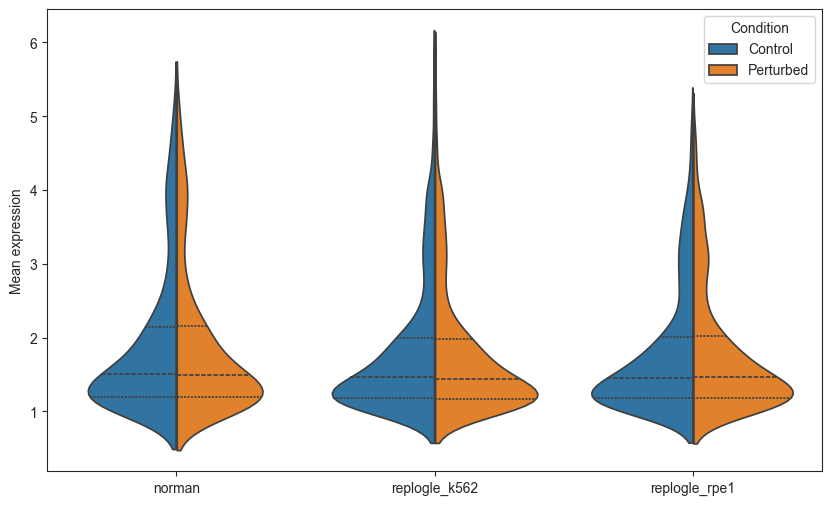

In [14]:
sns.violinplot(data=df, x="dataset", y="expression", hue="Condition", split=True, gap=.01, inner="quart")
# make the plot bigger
plt.gcf().set_size_inches(10, 6)
plt.xlabel("")
plt.ylabel("Mean expression")

plt.savefig('full_data_distribution.pdf', dpi=300)

# Plot differential expression for Norman dataset


In [15]:
# count how many times each condition occurs in sg_norman.obs['condition'] and store in a sorted dictionary with key=condition and value=count
from collections import Counter
condition_counts = Counter(sg_norman.obs['condition'])
condition_counts

Counter({'ctrl': 11855,
         'KLF1': 1960,
         'BAK1': 1457,
         'CEBPE': 1233,
         'UBASH3B': 1202,
         'ETS2': 1201,
         'OSR2': 1003,
         'SLC4A1': 1000,
         'SET': 986,
         'ELMSAN1': 937,
         'MAP2K6': 878,
         'FOXF1': 874,
         'FOXA1': 851,
         'UBASH3A': 819,
         'RUNX1T1': 779,
         'MEIS1': 776,
         'CNN1': 765,
         'MAPK1': 765,
         'MAP7D1': 751,
         'ZBTB25': 740,
         'DLX2': 732,
         'DUSP9': 731,
         'FEV': 704,
         'HOXB9': 701,
         'ZBTB1': 693,
         'TBX3': 691,
         'TBX2': 690,
         'PRTG': 685,
         'IKZF3': 681,
         'CLDN6': 670,
         'CBL': 663,
         'CBFA2T3': 658,
         'FOXL2': 652,
         'ZNF318': 650,
         'TGFBR2': 646,
         'KIF2C': 634,
         'FOSB': 630,
         'MAML2': 626,
         'SPI1': 613,
         'IGDCC3': 613,
         'COL2A1': 598,
         'BCL2L11': 582,
         'ISL2': 582,
 

In [28]:
control_group = 'ctrl'
perturbation_of_interest = ['HOXC13', 'COL1A1', 'MAP2K6']

In [29]:
sc.settings.set_figure_params(dpi=300)

In [30]:
# Create a list to store the axes for each plot
axes_list = []

# Set up a figure for the grid of plots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate UMAPs and store the axes
for idx, pert_of_interest in enumerate(perturbation_of_interest):
    # Subset the data to include only cells from the control and the perturbation of interest
    diff_sg_norman = sg_norman[sg_norman.obs['condition'].isin([control_group, pert_of_interest])]
    
    # Preprocess the data
    sc.pp.highly_variable_genes(diff_sg_norman, n_top_genes=2000)
    adata_subset = diff_sg_norman[:, diff_sg_norman.var.highly_variable]
    
    # Perform PCA
    # sc.tl.pca(adata_subset, n_comps=50)
    
    # Optional: cluster the cells (not necessary for DE analysis, but can be useful for visualization)
    sc.pp.neighbors(adata_subset, n_neighbors=50, n_pcs=40)
    sc.tl.umap(adata_subset)
    # sc.tl.leiden(adata_subset, resolution=0.5)
    
    # Plot UMAP to visualize clusters
    ax = sc.pl.umap(adata_subset, color=['condition'], show=False, legend_loc=None, ax=axes[idx])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"{pert_of_interest}")

    
    # Collect the axis for shared legend
    axes_list.append(ax)

# Create a shared legend
blue_line = mlines.Line2D([], [], color='C0', marker='o', markersize=7, linestyle=None, label='Control')
orange_line = mlines.Line2D([], [], color='orange', marker='o', linestyle=None, markersize=7, label='Perturbed')

# Adjust layout
plt.tight_layout(rect=[0.1, 0, 1, 1])

# Add the legend to the figure
fig.legend(handles=[blue_line, orange_line], bbox_to_anchor=(0, 0.95), loc='upper left')

plt.savefig('umap_norman.pdf', dpi=300)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:664: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


SystemError: CPUDispatcher(<function sparse_mean_var_minor_axis at 0x2868fedd0>) returned a result with an exception set

Error in callback <function flush_figures at 0x287ad28c0> (for post_execute):



KeyboardInterrupt



In [ ]:
if not os.path.exists("top_genes_norman.pkl"):
    # Preprocess the data
    sc.pp.highly_variable_genes(sg_norman, n_top_genes=2000)
    adata_subset = sg_norman[:, sg_norman.var.highly_variable]
    
    # Perform differential expression analysis
    sc.tl.rank_genes_groups(adata_subset, groupby='condition', method='wilcoxon', reference=control_group)
    
    # Show the top differentially expressed genes
    # sc.pl.rank_genes_groups(adata_subset, n_genes=20, sharey=False)
    
    # Access the results
    # adata_subset.uns['rank_genes_groups'] contains the results of the differential expression analysis
    # For example, to get the top 20 genes for the perturbation_of_interest compared to control:
    top_genes_norman = list(adata_subset.uns['rank_genes_groups']['names'][0])[:20]
    print(len(top_genes_norman))
    print(f"Top 20 DEGs for Norman:", top_genes_norman)
    
    with open('top_genes_norman.pkl', 'wb') as f:
        pkl.dump(top_genes_norman, f)
else:
    with open('top_genes_norman.pkl', 'rb') as f:
        top_genes_norman = pkl.load(f)

In [ ]:
sc.pp.highly_variable_genes(replogle_rpe1, n_top_genes=2000)
adata_subset = replogle_rpe1[:, replogle_rpe1.var.highly_variable]

sc.tl.rank_genes_groups(adata_subset, groupby='condition', method='wilcoxon', reference=control_group)

# sc.pl.rank_genes_groups(adata_subset, n_genes=20, sharey=False)

top_genes_replogle_rpe1 = list(adata_subset.uns['rank_genes_groups']['names'][0])[:20]
print(f"Top 20 DEGs for Replogle-RPE1:", top_genes_replogle_rpe1)

with open('top_genes_replogle_rpe1.pkl', 'wb') as f:
    pkl.dump(top_genes_replogle_rpe1, f)

/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:664: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_n

In [ ]:
# Preprocess the data
sc.pp.highly_variable_genes(replogle_k562, n_top_genes=2000)
adata_subset = replogle_k562[:, replogle_k562.var.highly_variable]

# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_subset, groupby='condition', method='wilcoxon', reference=control_group)

# Show the top differentially expressed genes
# sc.pl.rank_genes_groups(adata_subset, n_genes=20, sharey=False)

# Access the results
# For example, to get the top 20 genes for the perturbation_of_interest compared to control:
top_genes_replogle_k562 = list(adata_subset.uns['rank_genes_groups']['names'][0])[:20]
print(f"Top 20 DEGs for Replogle-K562:", top_genes_replogle_k562)

with open('top_genes_replogle_k562.pkl', 'wb') as f:
    pkl.dump(top_genes_replogle_k562, f)

In [119]:
# Filter each DataFrame to include only the top 20 genes
top_20_ctrl_norman = ctrl_norman_data[:, top_genes_norman].X.mean(axis=0)
top_20_ctrl_k562 = ctrl_replogle_k562[:, top_genes_replogle_k562].X.mean(axis=0)
top_20_ctrl_rpe1 = ctrl_replogle_rpe1[:, top_genes_replogle_rpe1].X.mean(axis=0)
top_20_perturb_norman = pert_norman_data[:, top_genes_norman].X.mean(axis=0)
top_20_perturb_k562 = pert_replogle_k562[:, top_genes_replogle_k562].X.mean(axis=0)
top_20_perturb_rpe1 = pert_replogle_rpe1[:, top_genes_replogle_rpe1].X.mean(axis=0)

# Create a DataFrame for each set of mean expressions
df_ctrl_norman = pd.DataFrame(top_20_ctrl_norman.T, columns=['expression'])
df_ctrl_k562 = pd.DataFrame(top_20_ctrl_k562.T, columns=['expression'])
df_ctrl_rpe1 = pd.DataFrame(top_20_ctrl_rpe1.T, columns=['expression'])
df_perturb_norman = pd.DataFrame(top_20_perturb_norman.T, columns=['expression'])
df_perturb_k562 = pd.DataFrame(top_20_perturb_k562.T, columns=['expression'])
df_perturb_rpe1 = pd.DataFrame(top_20_perturb_rpe1.T, columns=['expression'])

# Add 'dataset' and 'condition' columns
df_ctrl_norman['dataset'] = 'norman'
df_ctrl_k562['dataset'] = 'replogle_k562'
df_ctrl_rpe1['dataset'] = 'replogle_rpe1'
df_perturb_norman['dataset'] = 'norman'
df_perturb_k562['dataset'] = 'replogle_k562'
df_perturb_rpe1['dataset'] = 'replogle_rpe1'

df_ctrl_norman['Condition'] = 'Control'
df_ctrl_k562['Condition'] = 'Control'
df_ctrl_rpe1['Condition'] = 'Control'
df_perturb_norman['Condition'] = 'Perturbed'
df_perturb_k562['Condition'] = 'Perturbed'
df_perturb_rpe1['Condition'] = 'Perturbed'

# Concatenate all the DataFrames together
df_top_genes = pd.concat([df_ctrl_norman, df_ctrl_k562, df_ctrl_rpe1, df_perturb_norman, df_perturb_k562, df_perturb_rpe1])

# Plot the violin plot
sns.violinplot(data=df_top_genes, x="dataset", y="expression", hue="Condition", split=True, gap=.01, inner="quart")
plt.gcf().set_size_inches(10, 6)
plt.xlabel("")
plt.ylabel("Mean expression")
plt.savefig('top_20_genes_distribution.pdf', dpi=300)

KeyError: "Values ['ENSG00000034510', 'ENSG00000130656', 'ENSG00000141744', 'ENSG00000105610', 'ENSG00000196565', 'ENSG00000206172', 'ENSG00000213934', 'ENSG00000142227', 'ENSG00000182718', 'ENSG00000090013', 'ENSG00000069482', 'ENSG00000100097', 'ENSG00000167815', 'ENSG00000102575', 'ENSG00000158869', 'ENSG00000130208', 'ENSG00000188536', 'ENSG00000065978', 'ENSG00000163191', 'ENSG00000160789'], from ['ENSG00000034510', 'ENSG00000130656', 'ENSG00000141744', 'ENSG00000105610', 'ENSG00000196565', 'ENSG00000206172', 'ENSG00000213934', 'ENSG00000142227', 'ENSG00000182718', 'ENSG00000090013', 'ENSG00000069482', 'ENSG00000100097', 'ENSG00000167815', 'ENSG00000102575', 'ENSG00000158869', 'ENSG00000130208', 'ENSG00000188536', 'ENSG00000065978', 'ENSG00000163191', 'ENSG00000160789'], are not valid obs/ var names or indices."

# Plot UMAP for Norman test genes

In [3]:
import scanpy as sc 
import matplotlib.pyplot as plt
import pickle as pkl

In [16]:
split_of_interest = 0.70
# NOTE: can not do replicates because the split is different between replicates
# todo: fix 0.70 and make sure result for 0.00 is correct 
with open("../data/splits/perturb/norman/all_perts.pkl", 'rb') as f:
    all_perts = pkl.load(f)
with open(f"../data/splits/perturb/norman/norman_SPECTRA_splits/SP_0.70_0/test.pkl", 'rb') as f:
    test_genes = pkl.load(f)
test_genes

[2, 9]

In [31]:
control_group = 'ctrl'
test_perts = ['HOXC13', 'COL1A1', 'MAP2K6']

In [32]:
sc.settings.set_figure_params(dpi=300)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:664: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:664: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:664: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


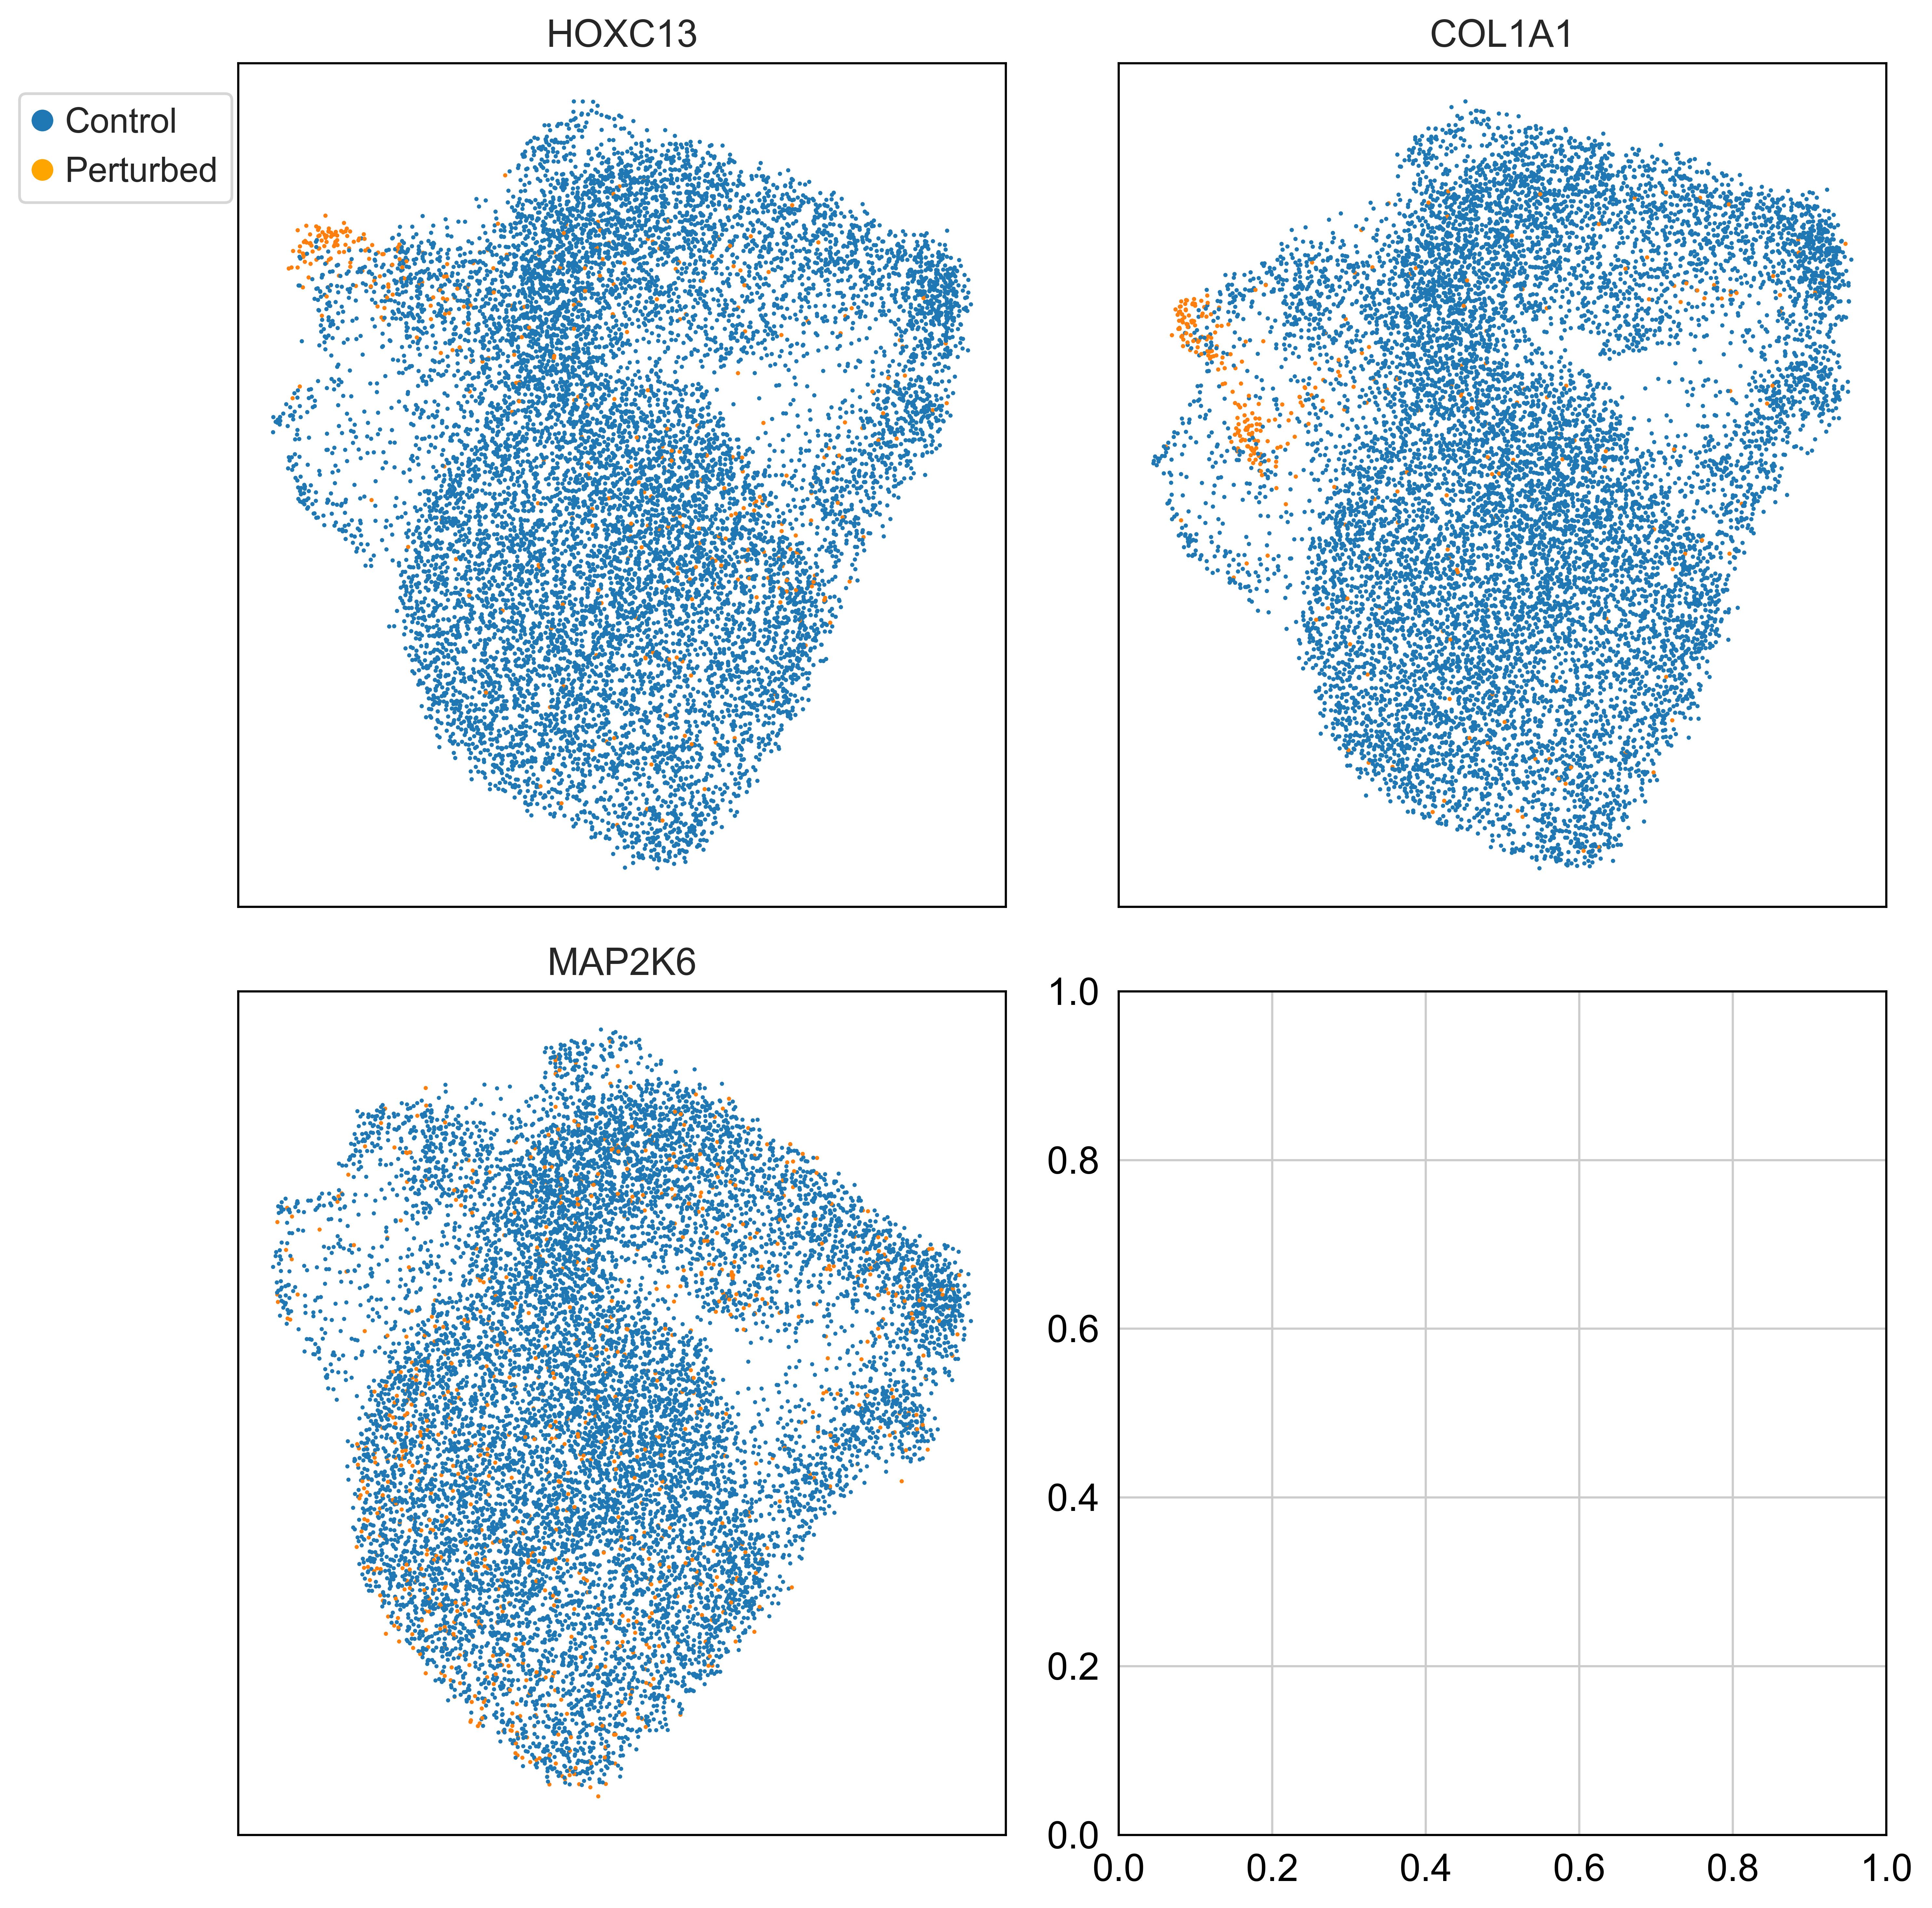

In [34]:
# Create a list to store the axes for each plot
axes_list = []

# Set up a figure for the grid of plots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate UMAPs and store the axes
for idx, pert_of_interest in enumerate(test_perts):
    # Subset the data to include only cells from the control and the perturbation of interest
    diff_sg_norman = sg_norman[sg_norman.obs['condition'].isin([control_group, pert_of_interest])]
    
    # Preprocess the data
    sc.pp.highly_variable_genes(diff_sg_norman, n_top_genes=2000)
    adata_subset = diff_sg_norman[:, diff_sg_norman.var.highly_variable]
    
    # Perform PCA
    # sc.tl.pca(adata_subset, n_comps=50)
    
    # Optional: cluster the cells (not necessary for DE analysis, but can be useful for visualization)
    sc.pp.neighbors(adata_subset, n_neighbors=50, n_pcs=40)
    sc.tl.umap(adata_subset)
    # sc.tl.leiden(adata_subset, resolution=0.5)
    
    # Plot UMAP to visualize clusters
    ax = sc.pl.umap(adata_subset, color=['condition'], show=False, legend_loc=None, ax=axes[idx])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"{pert_of_interest}")

    
    # Collect the axis for shared legend
    axes_list.append(ax)

# Create a shared legend
blue_line = mlines.Line2D([], [], color='C0', marker='o', markersize=7, linestyle=None, label='Control')
orange_line = mlines.Line2D([], [], color='orange', marker='o', linestyle=None, markersize=7, label='Perturbed')

# Adjust layout
plt.tight_layout(rect=[0.1, 0, 1, 1])

# Add the legend to the figure
fig.legend(handles=[blue_line, orange_line], bbox_to_anchor=(0, 0.95), loc='upper left')

plt.savefig('umap_norman_test_split_0.60_1_norman.pdf', dpi=300)

In [ ]:
# open 